In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

# load my own module
from helper import logistic_regression as lr  
from helper import general as general

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


# visualize data

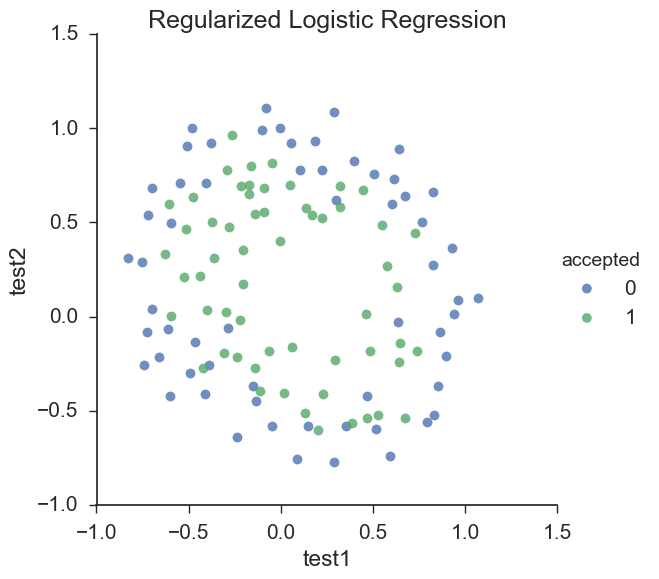

In [3]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')

# feature mapping

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="../img/mapped_feature.png">

In [4]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [5]:
data = lr.feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


In [6]:
data.describe()

,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
count,118.0,118.000000,118.000000,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.183102,0.301370,0.142350,1.710985e-01,0.115710,1.257256e-01,0.054779,-0.025472,0.015483,...,5.983333e-02,-0.005251,9.432094e-03,-0.001705,1.225384e-01,0.011812,1.893340e-02,5.196507e-02,-0.000703,7.837118e-02
std,0.0,0.519743,0.284536,0.326134,2.815658e-01,0.299092,2.964416e-01,0.496654,0.224075,0.150143,...,2.746459e-01,0.096738,5.455787e-02,0.037443,2.092709e-01,0.072274,3.430092e-02,2.148098e-01,0.058271,1.938621e-01
min,1.0,-0.769740,0.000026,-0.456071,6.855856e-10,-0.270222,1.795116e-14,-0.830070,-0.484096,-0.483743,...,-5.719317e-01,-0.296854,-1.592528e-01,-0.113448,1.612020e-09,-0.246068,2.577297e-10,-3.940702e-01,-0.203971,6.472253e-14
25%,1.0,-0.254385,0.061086,-0.016492,3.741593e-03,-0.001072,2.298277e-04,-0.372120,-0.178209,-0.042980,...,-5.155632e-02,-0.029360,-3.659760e-03,-0.005749,1.869975e-03,-0.001926,1.258285e-04,-7.147973e-03,-0.006381,8.086369e-05
50%,1.0,0.213455,0.252195,0.009734,6.360222e-02,0.000444,1.604015e-02,-0.006336,-0.016521,-0.000039,...,-2.544062e-07,-0.000512,-1.473547e-07,-0.000005,2.736163e-02,0.000205,3.387050e-03,-1.021440e-11,-0.000004,4.527344e-03
75%,1.0,0.646562,0.464189,0.270310,2.155453e-01,0.113020,1.001215e-01,0.478970,0.100795,0.079510,...,1.099616e-01,0.015050,1.370560e-02,0.001024,1.520801e-01,0.019183,2.090875e-02,2.526861e-02,0.002104,5.932959e-02
max,1.0,1.108900,1.229659,1.363569,1.512062e+00,1.676725,1.859321e+00,1.070900,0.568307,0.505577,...,1.228137e+00,0.369805,2.451845e-01,0.183548,1.315212e+00,0.304409,2.018260e-01,1.408460e+00,0.250577,1.508320e+00


# regularized cost
<img style="float: left;" src="../img/reg_cost.png">

In [7]:
theta = np.zeros(data.shape[1])
X = lr.feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = general.get_y(df)
print(y.shape)

(118, 28)
(118,)


In [8]:
lr.regularized_cost(theta, X, y, l=1)

0.6931471805599454

this is the same as the not regularized cost because we init theta as zeros...

# regularized gradient
<img style="float: left;" src="../img/reg_gradient.png">

In [9]:
lr.regularized_gradient(theta, X, y)

array([  8.47457627e-03,   7.77711864e-05,   3.76648474e-02,
         2.34764889e-02,   3.93028171e-02,   3.10079849e-02,
         3.87936363e-02,   1.87880932e-02,   1.15013308e-02,
         8.19244468e-03,   3.09593720e-03,   4.47629067e-03,
         1.37646175e-03,   5.03446395e-02,   7.32393391e-03,
         1.28600503e-02,   5.83822078e-03,   7.26504316e-03,
         1.83559872e-02,   2.23923907e-03,   3.38643902e-03,
         4.08503006e-04,   3.93486234e-02,   4.32983232e-03,
         6.31570797e-03,   1.99707467e-02,   1.09740238e-03,
         3.10312442e-02])

# fit the parameters

In [10]:
import scipy.optimize as opt

In [11]:
print('init cost = {}'.format(lr.regularized_cost(theta, X, y)))

res = opt.minimize(fun=lr.regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=lr.regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297128078
     jac: array([  4.06128511e-08,   1.23248926e-07,   1.11843754e-08,
         2.42932377e-08,  -2.79008988e-08,  -3.09799070e-09,
        -2.42314243e-08,   2.69894799e-09,   4.99531979e-09,
         1.11260284e-08,   4.16159464e-09,   7.62164605e-09,
        -1.68354246e-09,   6.26958161e-08,   3.05249450e-08,
        -2.54014292e-08,  -5.60465192e-10,  -1.10145308e-08,
         1.94433568e-08,  -5.76281431e-09,  -9.77792596e-09,
        -5.71315881e-09,  -1.45360581e-09,   1.83952843e-08,
        -1.09054922e-08,   9.29674104e-09,   1.01398558e-09,
        -5.76833648e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.27273957,  1.1810885 , -1.43166317, -0.17513102, -1.19281777,
       -0.45635784, -0.9246532 ,  0.62527151, -0.91742437, -0.35723861,
       -0.27470664, -0.29537756, -0.14388751, -2.01995872, -0.36553412,
       -0.61555763, -0.27778518, -

# predict

In [12]:
final_theta = res.x
y_pred = lr.predict(X, final_theta)

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.75      0.82        60
          1       0.78      0.91      0.84        58

avg / total       0.84      0.83      0.83       118

